# Here is our first attempt at preprocessing the data:

In [1]:
import pandas as pd
import numpy as np

import missingno as msno

#for plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Prepare data

In [2]:
X_TRAIN_PATH = 'Data/AMF_train_X_XCZw8r3.csv'
X_TEST_PATH  = 'Data/AMF_test_X_uDs0jHH.csv' # won't be loaded here
Y_TRAIN_PATH = 'Data/AMF_train_Y_omYQJZL.csv'

In [3]:
df_x_train = pd.read_csv(X_TRAIN_PATH, index_col=0, sep=',')
df_y_train = pd.read_csv(Y_TRAIN_PATH, sep=',')

In [4]:
data = df_x_train.copy()

In [5]:
data.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38


*Possible preprocessing*

- Shall we use Share ? Not Trader for sure (anonymization) nor Day (not the same month + can't retrieve easily day). Compute the avg number of different shares traded by day ?

In [6]:
data[(data['Trader'] == 'Trader_10') & (data['Day'] == 'Date_24')]

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.5,0.000,5117.830300,0.0000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
7,Isin_117,Date_24,Trader_10,2.100000,5.250000,NaN,0.000,380.267415,0.0000,3.309417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
21,Isin_12,Date_24,Trader_10,2.666667,8.000000,16.0,0.000,2276.061810,0.0000,540.075000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
63,Isin_27,Date_24,Trader_10,10.666667,6.400000,8.0,387.209,9181.440481,407.7441,2189.599600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
73,Isin_87,Date_24,Trader_10,1.647541,18.272727,100.5,0.000,1780.237823,0.0000,2.938824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31


### Add a trader type column to the original dataset

In [7]:
df_y_train.head()

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT


In [8]:
HFT = 'HFT'
NON_HFT = 'NON HFT'
MIX = 'MIX'
PURE = [HFT, NON_HFT]

In [9]:
hft_traders = df_y_train[df_y_train['type'] == HFT]['Trader'].tolist()
non_hft_traders = df_y_train[df_y_train['type'] == NON_HFT]['Trader'].tolist()
mix_traders = df_y_train[df_y_train['type'] == MIX]['Trader'].tolist()

In [10]:
def match(trader):
    if trader in hft_traders:
        return 1
    elif trader in non_hft_traders:
        return 0
    elif trader in mix_traders:
        return -1
    else:
        return -2

In [11]:
data['type'] = data['Trader'].apply(match)
data['type'].value_counts()/data.shape[0]

-1    0.486690
 1    0.302036
 0    0.211274
Name: type, dtype: float64

Absolute majority of mix traders rows, then HFT, then non-HFT

For the first pre-training, the proportions will be 40 - 60 for HFT

### Visualise the impact of date on trader activity

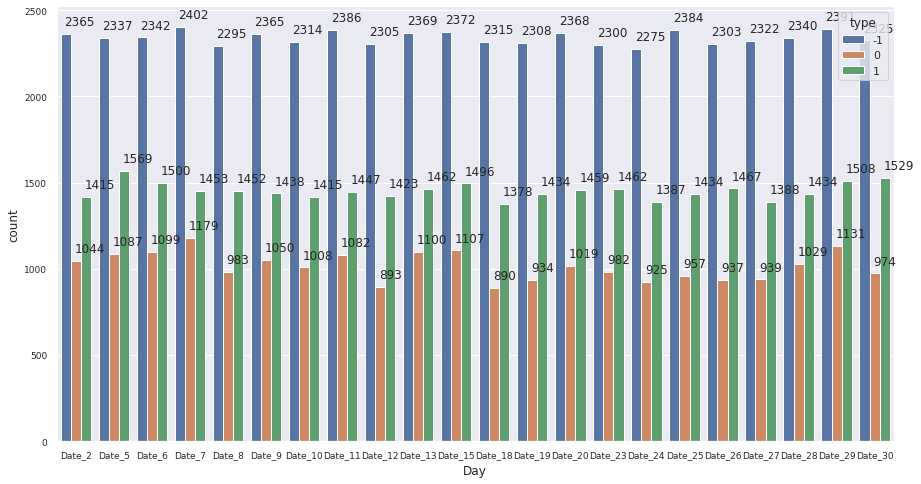

In [12]:
days = list(set(data['Day']))

def parseDay(day):
    return int(day[5:])

ORDER_DAYS = {}
for day in days:
    ORDER_DAYS[day] = parseDay(day)

days.sort(key=lambda val: ORDER_DAYS[val])

sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Day', 
                 hue='type', 
                 data=data,
                 order=days) # days have been sorted
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))    
ax.tick_params(labelsize=9)
plt.show()

#### Compute number of traded shares the same day

In [13]:
traders = list(set(data['Trader']))

In [14]:
count_share_day = {}
for t in traders:
    count_share_day[t] = {}
    for d in days:
        count_share_day[t][d] = (data[(data['Trader'] == t) & (data['Day'] == d)]).shape[0]


In [15]:
def count_share(t, d):
    return count_share_day[ t ][ d ]

In [16]:
data['Nber_shares_same_day'] = np.vectorize(count_share)(data['Trader'], data['Day'])

### Computing 1/OCR, 1/OTR, 1/OMR for each column:

In [17]:
data[['OCR', 'OTR', 'OMR']] = data[['OCR', 'OTR', 'OMR']].applymap(lambda x: 1/x if not pd.isnull(x) else 0)

### Visualise NaN data

<AxesSubplot:>

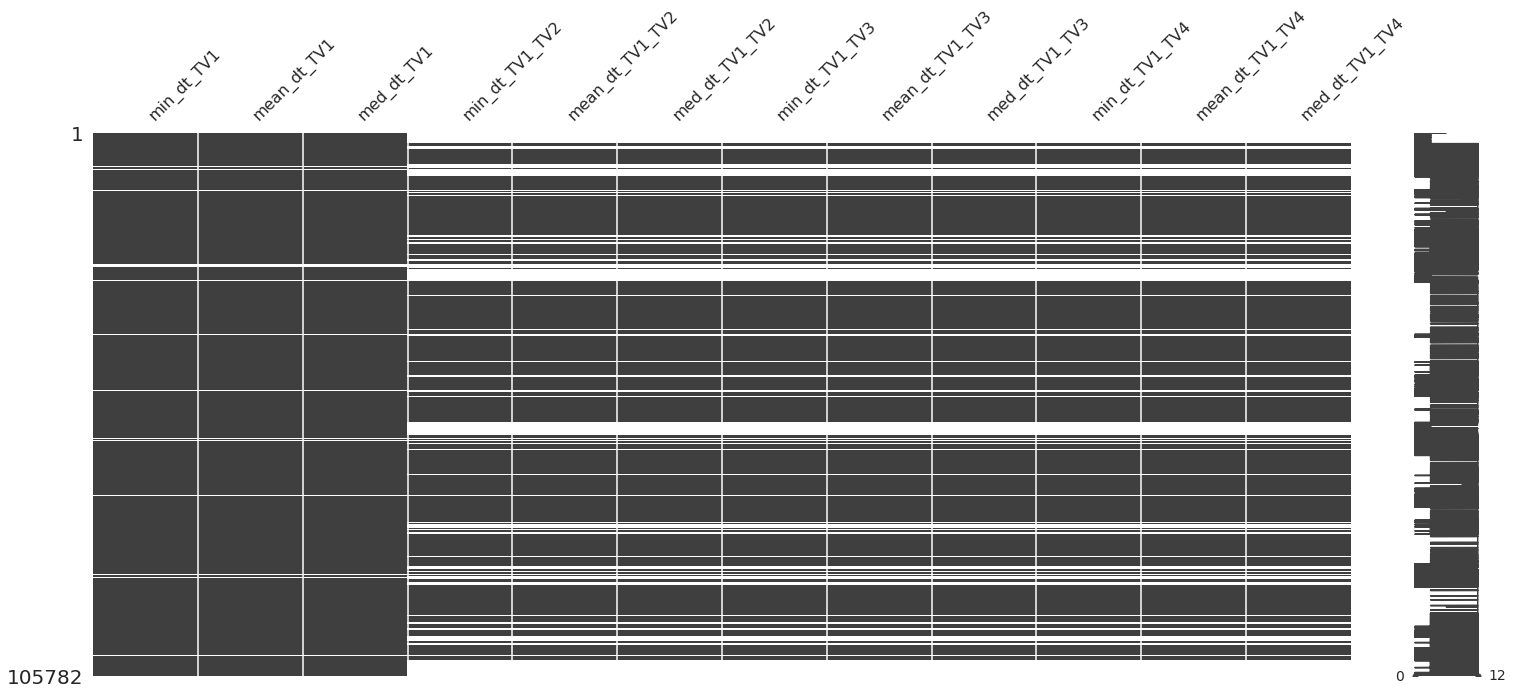

In [18]:
missingdata_df = data.columns[data.isnull().any()].tolist() # list of columns with NaN
msno.matrix(data[missingdata_df])

- Right part : it seems that traders are either only on TV1, or on all TVs (few exceptions)
- Also a correlation for min_dt_TV1, mean_dt_TV1, med_dt_TV1 -> must be investigated (0 trade ?)
- OTR and OMR means probaly that there were no Trade / Modif these days -> replace with very high value ?

In [19]:
data['NbTradeVenueMic'].value_counts()/data.shape[0]

1     0.216086
2     0.156321
5     0.081838
8     0.076591
6     0.066543
9     0.059452
7     0.058261
4     0.058044
3     0.050311
10    0.038816
11    0.029854
12    0.023199
13    0.020429
14    0.017574
15    0.014294
16    0.011023
17    0.007761
18    0.005729
19    0.004065
20    0.002146
21    0.001257
22    0.000312
23    0.000076
24    0.000019
Name: NbTradeVenueMic, dtype: float64

**'mean_dt_TV1' is NaN <=> 'min_dt_TV1' is NaN <=> 'med_dt_TV1' is NaN**

In [20]:
c = data['mean_dt_TV1'].isna().astype(int) + data['med_dt_TV1'].isna().astype(int) + data['min_dt_TV1'].isna().astype(int)
c.value_counts()

0    101547
3      4235
dtype: int64

**'mean_dt_TV1_TV2' is NaN <=> 'min_dt_TV1_TV2' is NaN <=> 'med_dt_TV1_TV2' is NaN**

In [21]:
c = data['mean_dt_TV1_TV2'].isna().astype(int) + data['med_dt_TV1_TV2'].isna().astype(int) + data['min_dt_TV1_TV2'].isna().astype(int)
c.value_counts()

0    80606
3    25176
dtype: int64

**'mean_dt_TV1_TV3' is NaN <=> 'min_dt_TV1_TV3' is NaN <=> 'med_dt_TV1_TV3' is NaN**

In [22]:
c = data['mean_dt_TV1_TV3'].isna().astype(int) + data['med_dt_TV1_TV3'].isna().astype(int) + data['min_dt_TV1_TV3'].isna().astype(int)
c.value_counts()

0    80527
3    25255
dtype: int64

**'mean_dt_TV1_TV4' is NaN <=> 'min_dt_TV1_TV4' is NaN <=> 'med_dt_TV1_TV4' is NaN**

In [23]:
c = data['mean_dt_TV1_TV4'].isna().astype(int) + data['med_dt_TV1_TV4'].isna().astype(int) + data['min_dt_TV1_TV4'].isna().astype(int)
c.value_counts()

0    80634
3    25148
dtype: int64

**'mean_dt_TV1' is NaN => for all i 'mean_dt_TV1_TVi' is NaN ?** NO

In [24]:
c = data['mean_dt_TV1'].isna().astype(int) * (1-data['mean_dt_TV1_TV2'].isna().astype(int))
c.value_counts()

0    105655
1       127
dtype: int64

In [25]:
c = data['mean_dt_TV1'].isna().astype(int) * (1-data['mean_dt_TV1_TV3'].isna().astype(int))
c.value_counts()

0    105716
1        66
dtype: int64

In [26]:
c = data['mean_dt_TV1'].isna().astype(int) * (1-data['mean_dt_TV1_TV4'].isna().astype(int))
c.value_counts()

0    105615
1       167
dtype: int64

In [27]:
NbVenueWithData = 4 - (data['mean_dt_TV1'].isna().astype(int) + data['mean_dt_TV1_TV2'].isna().astype(int) + data['mean_dt_TV1_TV3'].isna().astype(int) + data['mean_dt_TV1_TV4'].isna().astype(int))
NbVenueWithData.value_counts()

4    80402
1    21160
0     3966
2      216
3       38
dtype: int64

### Visualise distrbutions

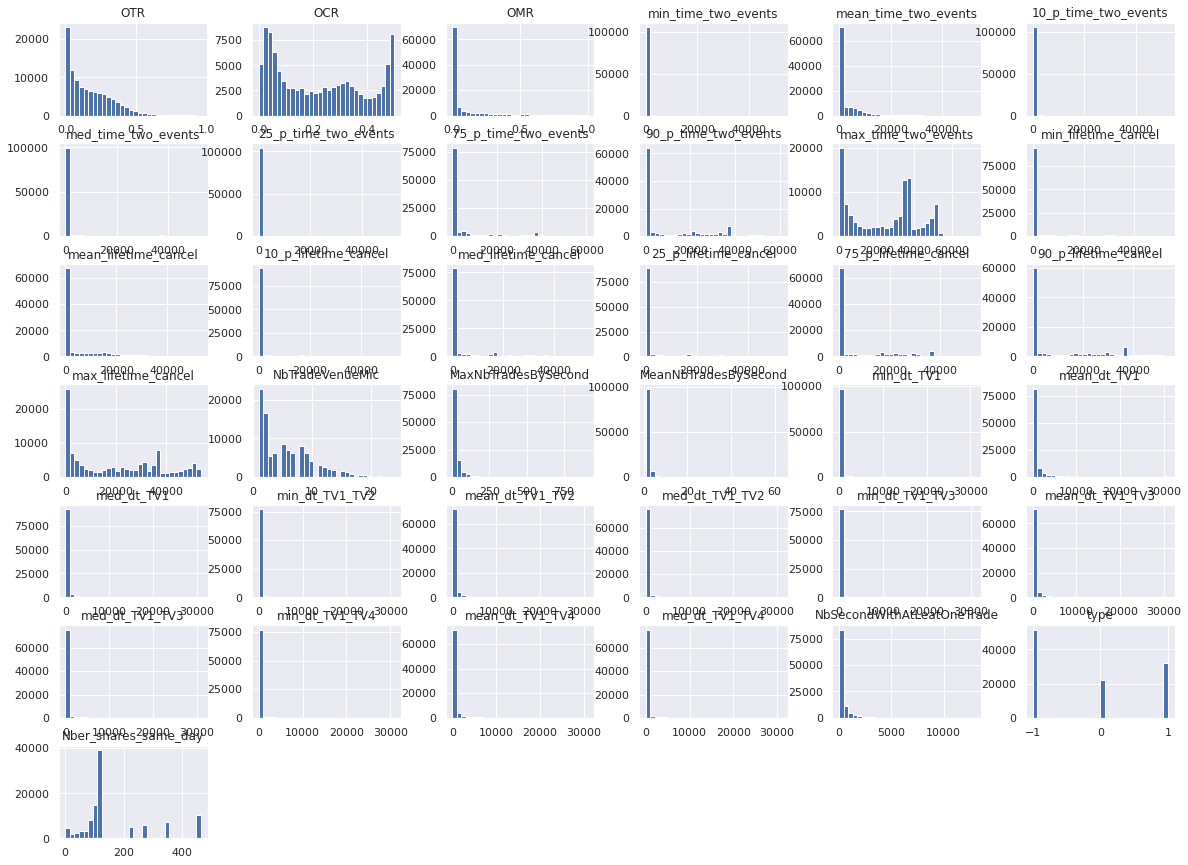

In [28]:
data.hist(bins=30, figsize=(20,15))
plt.show()

### Simplifying data

Remove string cols

In [29]:
string_cols = ['Share', 'Day', 'Trader']
light_data = data.drop(string_cols, axis = 1)

Remove multi loc data

In [30]:
multi_loc_cols = ['min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2',
                    'min_dt_TV1_TV3', 'mean_dt_TV1_TV3', 'med_dt_TV1_TV3',
                    'min_dt_TV1_TV4', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV4']

# light_data = data.drop(multi_loc_cols, axis=1)

In [31]:
light_data = data.drop(multi_loc_cols+string_cols, axis = 1)

In [32]:
missingdata_df

['min_dt_TV1',
 'mean_dt_TV1',
 'med_dt_TV1',
 'min_dt_TV1_TV2',
 'mean_dt_TV1_TV2',
 'med_dt_TV1_TV2',
 'min_dt_TV1_TV3',
 'mean_dt_TV1_TV3',
 'med_dt_TV1_TV3',
 'min_dt_TV1_TV4',
 'mean_dt_TV1_TV4',
 'med_dt_TV1_TV4']

#### Drop mix traders lines

In [33]:
#light_data = light_data[light_data.type != -1]
light_data.shape

(105782, 28)

Otherwise replace NaN with the mean of each columns

In [34]:
light_data.OMR.mean() # computes wihout NaNs

0.10852652537642861

In [35]:
for col in light_data.columns[light_data.isna().any()].tolist():
    light_data[col] = light_data[col].fillna(value=light_data[col].mean())

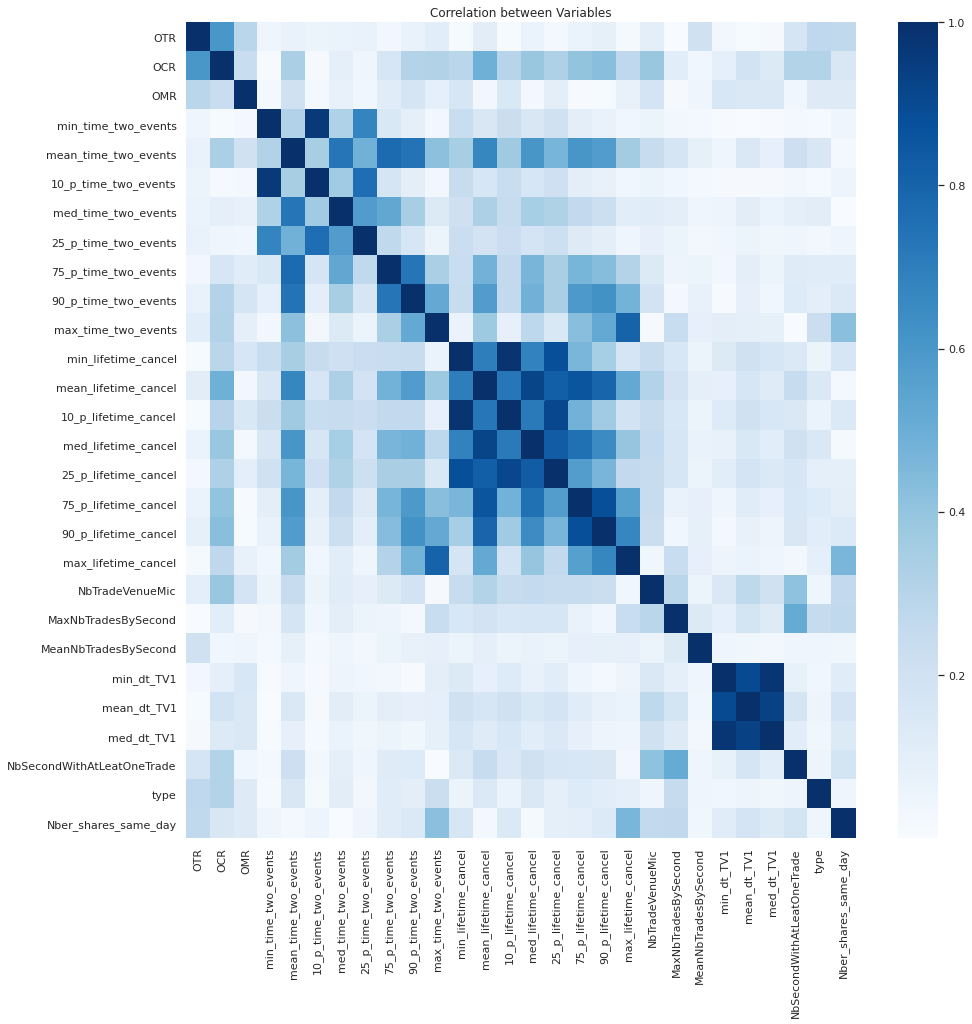

In [36]:
corr = light_data.corr()
corr = np.abs(corr)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, annot=False, ax=ax, cmap="Blues"); 
ax.set_title("Correlation between Variables");

Quantiles are worse than avg stats

In [37]:
seen_keys = []
for i in corr.columns:
    if(corr[i]['type'] < 0.1):
        print("Very bad",i,"\n")
    for j in seen_keys:
        if(abs(corr[i][j]) > 0.8):
            print("High correlation between", i, "and", j)
            print(i, "better than",j,": ", corr[i]['type'] > corr[j]['type'],"\n")
    seen_keys.append(i)

Very bad min_time_two_events 

Very bad 10_p_time_two_events 

High correlation between 10_p_time_two_events and min_time_two_events
10_p_time_two_events better than min_time_two_events :  True 

Very bad 25_p_time_two_events 

Very bad 90_p_time_two_events 

Very bad min_lifetime_cancel 

Very bad 10_p_lifetime_cancel 

High correlation between 10_p_lifetime_cancel and min_lifetime_cancel
10_p_lifetime_cancel better than min_lifetime_cancel :  True 

High correlation between med_lifetime_cancel and mean_lifetime_cancel
med_lifetime_cancel better than mean_lifetime_cancel :  True 

Very bad 25_p_lifetime_cancel 

High correlation between 25_p_lifetime_cancel and min_lifetime_cancel
25_p_lifetime_cancel better than min_lifetime_cancel :  True 

High correlation between 25_p_lifetime_cancel and mean_lifetime_cancel
25_p_lifetime_cancel better than mean_lifetime_cancel :  False 

High correlation between 25_p_lifetime_cancel and 10_p_lifetime_cancel
25_p_lifetime_cancel better than 10_p_l

In [38]:
events_dropped = ['min_time_two_events', 'mean_time_two_events'] # keep 10, 75, 90

cancel_dropped = ['10_p_lifetime_cancel', '25_p_lifetime_cancel', '75_p_lifetime_cancel',
                'mean_lifetime_cancel', 'max_lifetime_cancel']

TV1_dropped = ['min_dt_TV1', 'med_dt_TV1']

corr_dropped = events_dropped+cancel_dropped+TV1_dropped

In [39]:
very_light_data = light_data.drop(corr_dropped, axis=1)

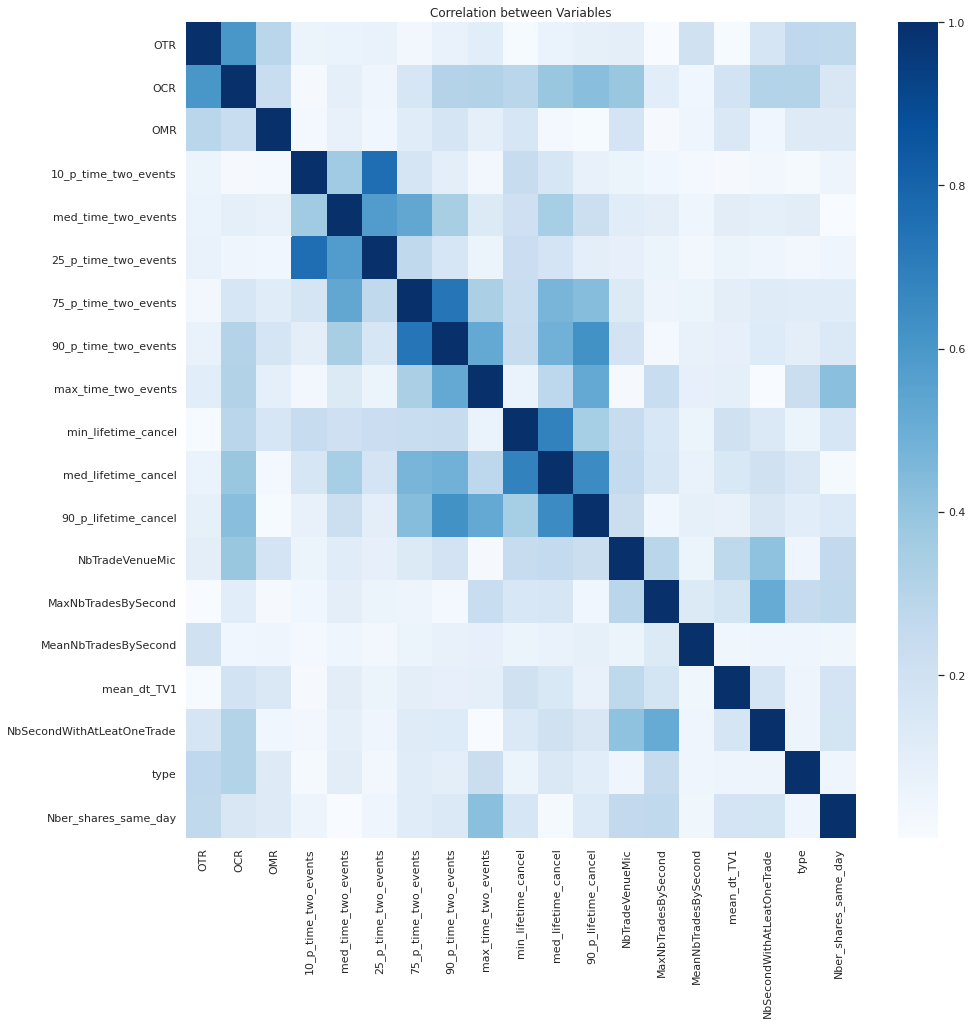

In [40]:
corr = np.abs(very_light_data.corr())
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, annot=False, ax=ax, cmap="Blues"); 
ax.set_title("Correlation between Variables");

In [41]:
very_light_data.shape

(105782, 19)

In [42]:
very_light_data_withoutMIX = very_light_data[light_data.type != -1]
very_light_data_withoutMIX.shape

(54299, 19)

In [43]:
save_data = True

if(save_data):
    very_light_data.to_csv("Data/inverted_OCR.csv")
    very_light_data_withoutMIX.to_csv("Data/inverted_OCR_without_MIX.csv")

In [47]:
very_light_data_withoutMIX

,OTR,OCR,OMR,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,med_lifetime_cancel,90_p_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,mean_dt_TV1,NbSecondWithAtLeatOneTrade,type,Nber_shares_same_day
Index,,,,,,,,,,,,,,,,,,,
1,0.440000,0.120000,0.080000,0.000000,419.688500,10.722543,984.320560,23151.83800,25139.59800,682.153260,984.32056,23151.8380,1,7,2.750000,9639.216031,4,0,5
2,0.589404,0.039735,0.046358,0.000074,0.003374,0.000204,8.768699,2671.48830,31278.35700,11.866026,177.93991,21433.6840,1,17,5.933333,493.559196,15,0,5
3,0.674419,0.021142,0.008457,0.000071,0.000599,0.000129,5.725427,448.88360,30799.46700,2.761036,187.99548,1953.6235,1,20,5.063492,163.954785,63,0,4
4,0.586207,0.068966,0.034483,0.000000,6.152666,0.000945,62.444176,19187.71900,19187.71900,286.019320,286.01932,19187.7190,1,8,4.250000,1232.562133,4,0,3
5,0.658879,0.037383,0.000000,0.000071,0.001364,0.000146,2.225420,273.45676,23164.51400,2.798452,1345.95280,23164.5140,1,19,3.710526,248.073927,38,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105778,0.869565,0.043478,0.000000,0.000000,0.000188,0.000039,0.003226,1228.04750,7609.94340,7609.944300,7609.94430,7609.9443,1,15,6.666667,927.968000,3,0,3
105779,0.739130,0.043478,0.000000,0.000000,0.000963,0.000176,70.822190,307.08710,392.75638,567.153000,567.15300,567.1530,1,4,2.428571,143.065500,7,0,2
105780,0.872093,0.011628,0.000000,0.000000,0.000578,0.000062,1.023857,4.95412,23448.52500,23448.525000,23448.52500,23448.5250,1,21,4.687500,1157.596000,16,0,1
